In [191]:
from pathlib import Path
from typing import cast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

%load_ext autoreload
%autoreload 2
import ml_project.data as d
import ml_project.helpers as h

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
ds = d.Dataset(Path("../data/15s.arff"))

In [193]:
cls_map = ds.cls_id_repr_map

# Extract class names and numbers
class_names = [v.split(' (')[0] for v in cls_map.values()]
class_numbers = [int(k) for k in cls_map.keys()]

# Recreate the df
df = pd.DataFrame({
    "class_name": class_names,
    "id": class_numbers
})

# Hide the initial 0-based indexing 
df_noidx = df.style.hide(axis="index")

# Display & save the df as an image
display(df_noidx)
d.save(df_noidx, "1. unique_classes.png")

class_name,id
BROWSING,1
CHAT,2
STREAMING,3
MAIL,4
VOIP,5
P2P,6
FT,7
VPN-VOIP,8
VPN-CHAT,9
VPN-STREAMING,10


In [194]:
# TODO: finding a better way to showcase the features. 
desc_df = d.describe(ds.orig)
desc_df.insert(0, "id", range(1, len(desc_df) + 1))
d.save(desc_df, "2. features summary.png")
desc_df

,id,count,mean,std,min,25%,50%,75%,max
duration,1,18758.0,16.000000,16.400000,-inf,12.7,16.2,16.5,20.2
total_fiat,2,18758.0,13.300000,14.600000,NaN,1.9,4.1,7.4,17.4
total_biat,3,18758.0,13.300000,14.600000,NaN,0.6,3.0,7.4,17.5
min_fiat,4,18758.0,15.000000,16.100000,NaN,10.1,12.5,15.2,19.5
min_biat,5,18758.0,14.800000,16.000000,NaN,10.1,12.5,15.2,20.2
max_fiat,6,18758.0,13.800000,14.900000,-inf,9.3,10.8,13.1,18.8
max_biat,7,18758.0,13.700000,14.700000,-inf,8.6,10.4,13.0,17.5
mean_fiat,8,18758.0,13.600000,15.200000,-inf,4.7,9.3,13.3,19.1
mean_biat,9,18758.0,13.300000,14.700000,-inf,-inf,9.1,13.1,18.4
pps,10,18758.0,7.600000,9.800000,-inf,0.9,2.4,4.6,13.8


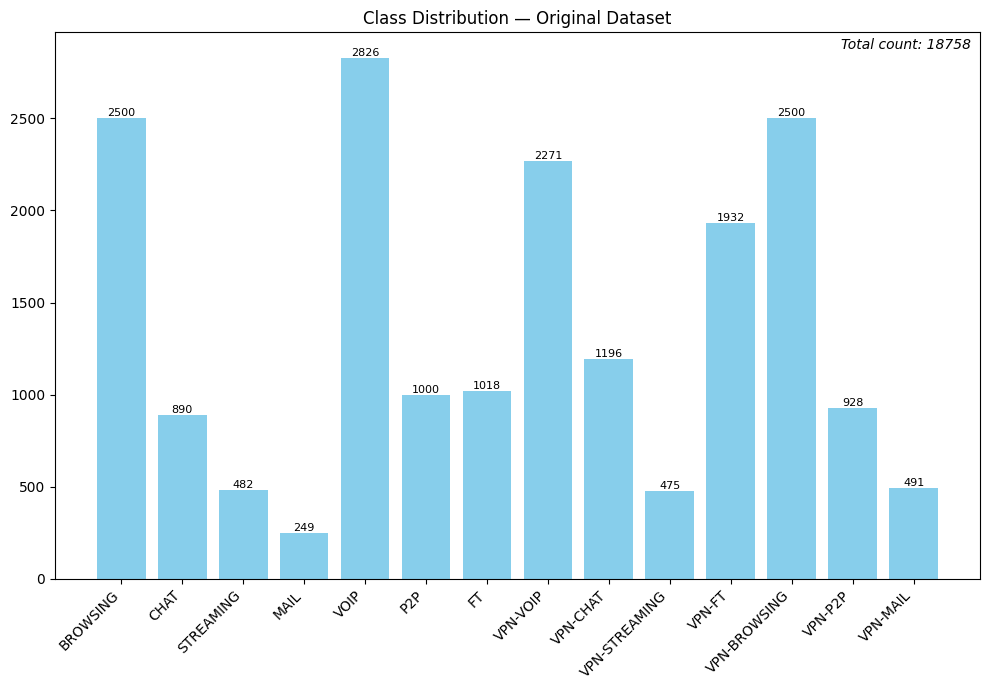

In [195]:
# Call method class_fraction on the original dataset
orig_class_fraction = ds.class_fraction(ds.orig)

# Extract the 'pop' (population) column, reset index, and remove the last row (the total)
pop_df = orig_class_fraction["pop"].reset_index().iloc[:-1]

# The class names
class_names = [v.split(' (')[0] for v in cls_map.values()]
pop_df["index"] = class_names

# Set up the plot
plt.figure(figsize=(10, 7))
bars = plt.bar(pop_df["index"], pop_df["pop"], color="skyblue")

# Add total count on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Show total population count in the top right corner
total_count = pop_df["pop"].sum()
plt.text(
    0.99, 0.99,
    f"Total count: {total_count}",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=10,
    style='italic'
)

# Improve x-axis readability
plt.xticks(rotation=45, ha="right")

# TODO: Maybe we don't need the x and y-axis labels? Looks prettier imo
# plt.xlabel("Class Name")
# plt.ylabel("Population")

plt.title("Class Distribution — Original Dataset")
plt.tight_layout()
plt.savefig("../img/3. class_distribution_orig.png", dpi=600, bbox_inches='tight')
plt.show()

In [196]:
# some_missing: rows with at least one missing value
some_missing = ds.orig.loc[(ds.orig <= 0).apply("any", axis=1)]

# none_missing: rows with NO missing values
none_missing = ds.orig.loc[~some_missing_cond]

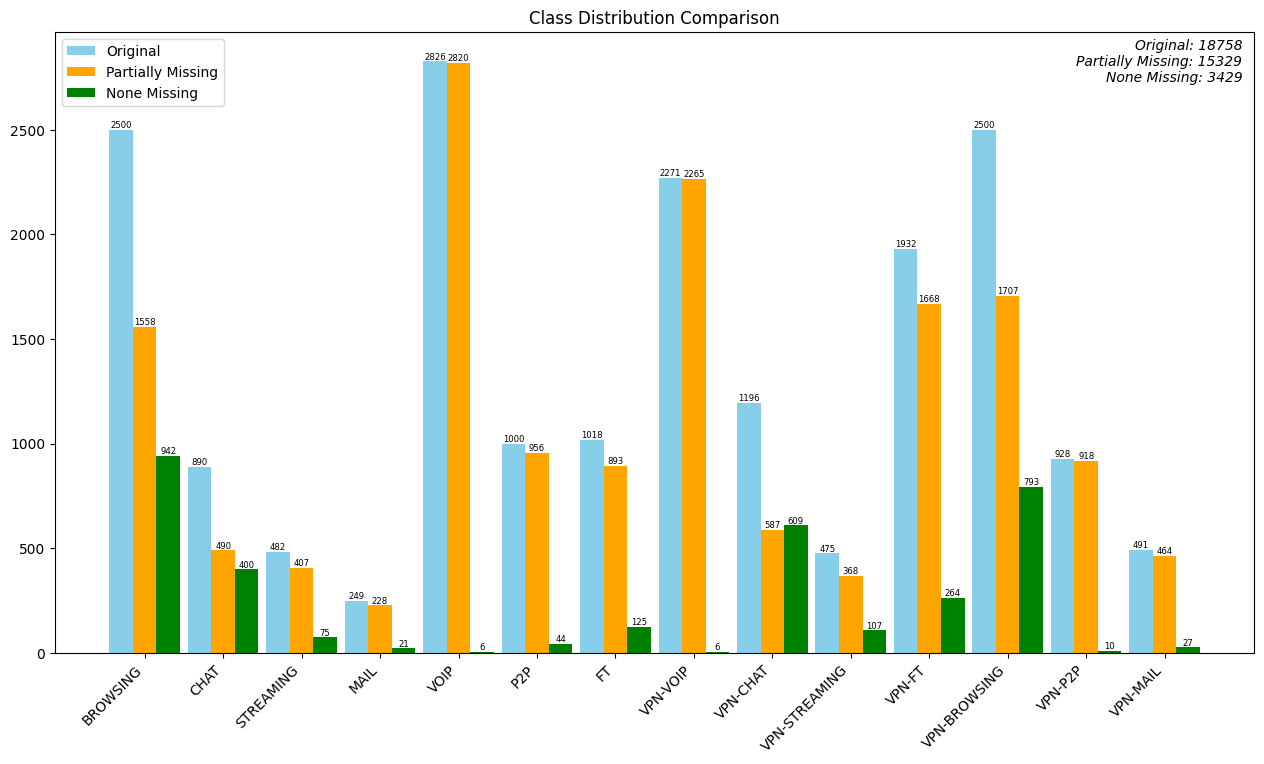

In [197]:
# The three datasets we have currently
dfs = [
    ds.class_fraction(ds.orig),
    ds.class_fraction(some_missing),
    ds.class_fraction(none_missing)
]

# Labels and colors for each dataset
labels = ["Original", "Partially Missing", "None Missing"]
colors = ["skyblue", "orange", "green"]

# Classnames without parenthesis
class_names = [v.split(' (')[0] for v in cls_map.values()]

# Build a matrix: rows = datasets, columns = classes
counts = []
for df in dfs:
    pop_df = df["pop"].reset_index().iloc[:-1]  # drop last row as it’s a total
    counts.append(pop_df["pop"].values)

counts = np.array(counts) # Shape: (num_datasets, num_classes)

# Prepare plot positions and sizes
num_classes = counts.shape[1]
x = np.arange(num_classes)
width = 0.3

fig, ax = plt.subplots(figsize=(13, 8))

# Plot each dataset as a group of bars, offset horizontally
for i in range(len(dfs)):
    bars = ax.bar(
        x + i * width - width, # center the grouped bars
        counts[i],
        width,
        label=labels[i],
        color=colors[i]
    )

    # Add counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=6.1
        )

# X-axis: class names, rotated
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')

# Total counts for each dataset in the corner
total_counts = [arr.sum() for arr in counts]
ax.text(
    0.99, 0.99,
    '\n'.join([f"{label}: {total}" for label, total in zip(labels, total_counts)]),
    transform=ax.transAxes,
    ha='right',
    va='top',
    fontsize=10,
    style='italic'
)

# Title and legend
ax.set_title("Class Distribution Comparison")
ax.legend()

# Tidy up layout and save
plt.tight_layout(pad=2)
plt.savefig("../img/4.problematic_distribution_grouped.png", dpi=600, bbox_inches='tight')
plt.show()


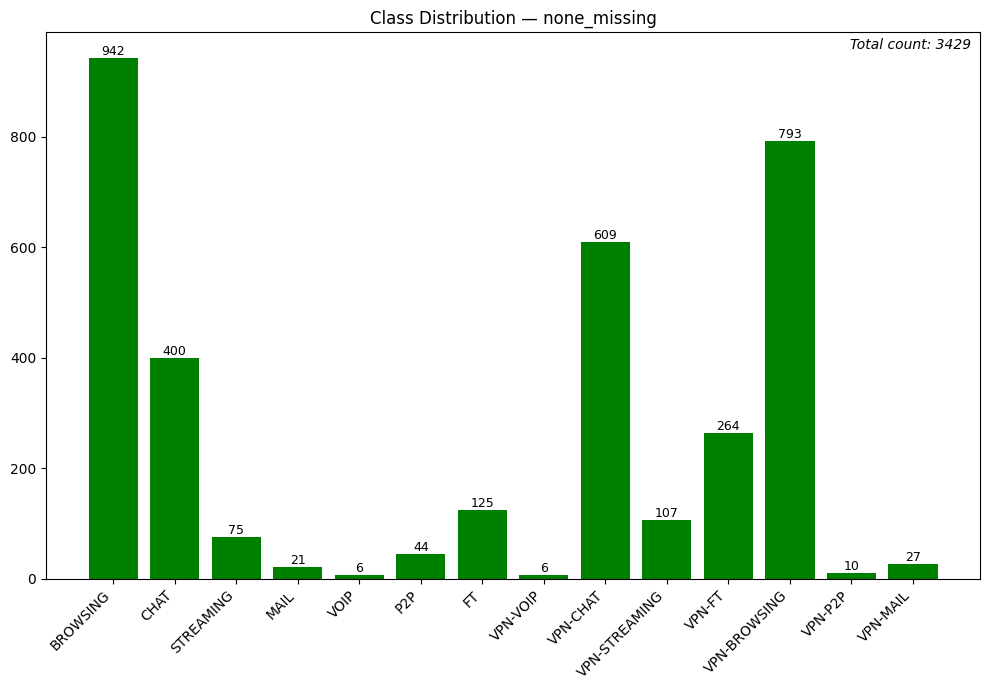

In [198]:
# A simple df with classnames and population count for none_missing
pop_df = ds.class_fraction(none_missing)["pop"].reset_index().iloc[:-1]

# Classnames
class_names = [v.split(' (')[0] for v in cls_map.values()]
pop_df["index"] = class_names

# Set up the figure
plt.figure(figsize=(10, 7))

# Draw the bars
bars = plt.bar(
    pop_df["index"],
    pop_df["pop"],
    color="green"
)

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Add total count in top right corner
total_count = pop_df["pop"].sum()
plt.text(
    0.99, 0.99,
    f"Total count: {total_count}",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=10,
    style='italic'
)

# Rotate class names for readability
plt.xticks(rotation=45, ha="right")

# TODO: perhaps we don't need the x and y-axis labels here either
# plt.xlabel("Class Name")
# plt.ylabel("Population")

plt.title("Class Distribution — none_missing")
plt.tight_layout()
plt.savefig("../img/5 none_missing.png", dpi=600, bbox_inches='tight')
plt.show()


In [199]:
# Visualising what percentage of the data is missing
a = len(ds.orig)
b = len(none_missing)

df = pd.DataFrame({
    'original': [f"{a}"],
    'none_missing': [f"{b}"],
    'Percentage Missing': [f"{100 - round(b / a * 100, 2)}%"] 
})

df_noidx = df.style.hide(axis="index")
d.save(df_noidx, "6. percentage_missing.png")

df_noidx

original,none_missing,Percentage Missing
18758,3429,81.72%
